In [110]:
import pandas as pd
import re

In [111]:
import sys
sys.path.append("/Users/chrisbuetti/Desktop/digitalprezence/influencer-reporting-v2/")

In [112]:
import os
import requests
import secrets
import time


os.environ['MONGODB_SECRET_LOCATION'] = 'dev/influencer-reporting-v2/mongodb'
os.environ['DB_NAME'] = 'influencerReporting'
os.environ['INFLUENCER_CAMPAIGN_DETAILS_COLLECTION'] = 'campaignDetails'
os.environ['INFLUENCER_TRACKING_COLLECTION'] = 'influencers'
os.environ['INFLUENCER_REPORTING_QUEUE'] = 'dev-influencer-reporting-queue-v2'
os.environ['PROXY_SECRET_LOCATION'] = 'dev/influencer-reporting-v2/proxy'

from start_tracking import db
reach_data = db['reach_data']

In [113]:
def extract_hashtags(string):
    return re.findall(r'#(\w+)', string)

In [114]:
def has_location(doc):
    try:
        doc['location']
        return True
    except:
        return False

In [115]:
def transform_post(post):
    return [
        post['__typename'],
        post['shortcode'],
        post['is_video'],
        post['accessibility_caption'],
        post['edge_media_to_caption']['edges'][0]['node']['text'],
        len(extract_hashtags(post['edge_media_to_caption']['edges'][0]['node']['text'])),
        post['edge_media_to_comment']['count'],
        post['comments_disabled'],
        post['taken_at_timestamp'],
        post['edge_liked_by']['count'],
        post['impressions'],
        post['reach'],
        post['record_time']
    ]

In [116]:
docs = list()
cursor = reach_data.find({})
for document in cursor:
    docs.append(document)

In [117]:
doc = docs[0]

In [118]:
doc.keys()

dict_keys(['_id', 'biography', 'blocked_by_viewer', 'restricted_by_viewer', 'country_block', 'external_url', 'external_url_linkshimmed', 'edge_followed_by', 'fbid', 'followed_by_viewer', 'edge_follow', 'follows_viewer', 'full_name', 'has_ar_effects', 'has_clips', 'has_guides', 'has_channel', 'has_blocked_viewer', 'highlight_reel_count', 'has_requested_viewer', 'id', 'is_business_account', 'is_professional_account', 'is_joined_recently', 'business_category_name', 'overall_category_name', 'category_enum', 'category_name', 'is_private', 'is_verified', 'edge_mutual_followed_by', 'profile_pic_url', 'profile_pic_url_hd', 'requested_by_viewer', 'should_show_category', 'should_show_public_contacts', 'username', 'connected_fb_page', 'edge_felix_video_timeline', 'edge_owner_to_timeline_media', 'edge_saved_media', 'edge_media_collections', 'edge_related_profiles'])

In [119]:
rows = []
for user in docs:
    row_beginning = [
        user['biography'],
        user['external_url'],
        user['edge_followed_by']['count'],
        user['has_clips'],
        user['has_channel'],
        user['has_guides'],
        user['highlight_reel_count'],
        user['id'],
        user['is_business_account'],
        user['is_professional_account'],
        user['is_joined_recently'],
        user['business_category_name'],
        user['category_name'],
        user['is_verified'],
        user['should_show_category'],
        user['username'],
        user['edge_owner_to_timeline_media']['count']
    ]
    for node in user['edge_owner_to_timeline_media']['edges']:
        post = node['node']
        rows.append(row_beginning + transform_post(post))


In [120]:
cols = [
    "biography",
    "external_url",
    "follower_count",
    "has_clips",
    "has_channel",
    "has_guides",
    "highlight_reel_count",
    "id",
    "is_business",
    "is_professional",
    "joined_recently",
    "business_category_name",
    "category_name",
    "is_verified",
    "should_show_category",
    "username",
    "media_count",
    "media_type",
    "shortcode",
    "is_video",
    "accessibility_caption",
    "caption",
    "hashtag_count",
    "comment_count",
    "comments_disabled",
    "taken_at_timestamp",
    "like_count",
    "impressions",
    "reach",
    "record_time"
    ]

In [235]:
df = pd.DataFrame(columns = cols, dtype='object')

In [236]:
for row in rows:
    df.loc[len(df)] = row

In [237]:
df = df[df.reach != 0]

In [238]:
df.to_csv('/Users/chrisbuetti/Desktop/df.csv', index=None)

In [631]:
df = pd.read_csv('/Users/chrisbuetti/Desktop/df.csv', index_col = None)

In [632]:
df

,biography,external_url,follower_count,has_clips,has_channel,has_guides,highlight_reel_count,id,is_business,is_professional,...,accessibility_caption,caption,hashtag_count,comment_count,comments_disabled,taken_at_timestamp,like_count,impressions,reach,record_time
0,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....",HELP US OUT: What's your favorite restaurant i...,27,15,False,1619186863,1131,3041,3006,1.619192e+09
1,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....",What is your NY sports team? Comment 👇🏻🗽💥\n\n....,27,19,False,1619015337,2006,39990,38739,1.619192e+09
2,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....",Which borough are you from? Comment below👇🏻🗽💥\...,27,13,False,1618753582,1178,33751,33148,1.619192e+09
3,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....","""You haven't lived until you've died in New Yo...",27,9,False,1618583533,1235,33631,31838,1.619192e+09
4,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....","What is your favorite season in NYC - Summer, ...",27,11,False,1618409211,1195,38152,37252,1.619192e+09
5,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....",What is the most beautiful building in NY? Tel...,27,34,False,1618322853,2863,98675,98559,1.619192e+09
6,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in Manhattan, New York....",A bad day in New York City is still better tha...,27,21,False,1617889855,1513,67711,64602,1.619192e+09
7,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in New York, New York. ...",“The flag of New York City should be someone w...,27,65,False,1617717867,3706,233028,229323,1.619192e+09
8,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in New York, New York.","Is New York the most beautiful in Summer, Wint...",27,17,False,1617373266,1145,90595,86921,1.619192e+09
9,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,"Photo by Beautiful NYC in New York, New York. ...",Email your NYC pics to beautiful.newyorkcity@g...,27,15,False,1617111681,1645,73971,71246,1.619192e+09


Transformations to make:
Has external URL: 0/1
Media type: 1/2/3
Comments -> comment ratio
like -> Like ratio
record_time -> seconds_alive

In [633]:
# 0 if no URL, 1 if yes
has_url = []
for url in list(df.external_url):
    if url is not None:
        has_url.append(1)
    else:
        has_url.append(0)

In [634]:
df['has_url'] = has_url

In [635]:
# Transform media type
set(list(df.media_type))

{'GraphImage', 'GraphSidecar', 'GraphVideo'}

In [636]:
media_type_code = []
for media_type in list(df.media_type):
    if media_type == 'GraphImage':
        media_type_code.append(1)
    elif media_type == 'GraphVideo':
        media_type_code.append(2)
    else:
        media_type_code.append(3)
df['media_type_code'] = media_type_code

In [637]:
# Like Ratio, comment ratio, seconds_alive
like_ratio = []
comment_ratio = []
days_alive = []
for index, row in df.iterrows():
    follower_count = row['follower_count']
    like_count = row['like_count']
    like_ratio.append(like_count/follower_count)
    
    comment_count = row['comment_count']
    comment_ratio.append(comment_count/follower_count)
    
    days_alive.append((row['record_time'] - row['taken_at_timestamp']) / 86400)
    
df['like_ratio'] = like_ratio
df['comment_ratio'] = comment_ratio
df['days_alive'] = days_alive
    

In [638]:
df.head()

,biography,external_url,follower_count,has_clips,has_channel,has_guides,highlight_reel_count,id,is_business,is_professional,...,taken_at_timestamp,like_count,impressions,reach,record_time,has_url,media_type_code,like_ratio,comment_ratio,days_alive
0,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,1619186863,1131,3041,3006,1.619192e+09,1,1,0.012602,0.000167,0.056882
1,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,1619015337,2006,39990,38739,1.619192e+09,1,1,0.022351,0.000212,2.043694
2,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,1618753582,1178,33751,33148,1.619192e+09,1,1,0.013125,0.000145,5.073543
3,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,1618583533,1235,33631,31838,1.619192e+09,1,1,0.013760,0.000100,7.041997
4,"🗽 NYC Shots, Food, & More\n📩 beautiful.newyork...",NaN,89750,False,False,False,8,8034712481,True,True,...,1618409211,1195,38152,37252,1.619192e+09,1,1,0.013315,0.000123,9.059813


In [138]:
#Select relevant columns FOR REACH FIRST

In [639]:
relevant_columns = [
    "follower_count",
    "has_clips",
    "has_channel",
    "has_guides",
    "highlight_reel_count",
    "is_business",
    "is_professional",
    "joined_recently",
    "is_verified",
    "should_show_category",
    "media_count",
    "shortcode",
    "is_video",
    "hashtag_count",
    "comments_disabled",
    "reach",
    "has_url",
    "media_type_code",
    "like_ratio",
    "comment_ratio",
    "days_alive",
    "like_count",
    "comment_count"
]


In [640]:
df = df[relevant_columns]

In [641]:
len(df)

57

In [642]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [643]:
basic = df[['like_count', 'comment_count', "like_ratio", "comment_ratio", "follower_count", 'reach']]
basic = basic[1:]
basic['reach'] = basic.reach.astype(int)
basic['comment_count'] = basic.comment_count.astype(int)
basic['like_count'] = basic.like_count.astype(int)
basic['follower_count'] = basic.follower_count.astype(float)

basic['follower_sq'] = np.square(basic['follower_count'])
basic['like_sq'] = np.square(basic['like_count'])
basic['comment_sq'] = np.square(basic['comment_count'])
basic['lr_sq'] = np.square(basic['like_ratio'])
basic['cr_sq'] = np.square(basic['comment_ratio'])

basic['follower_log'] = np.log(basic['follower_count'])
basic['like_log'] = np.log(basic['like_count'])
basic['comment_log'] = np.log(basic['comment_count'])
basic['lr_log'] = np.log(basic['like_ratio'])
basic['cr_log'] = np.log(basic['comment_ratio'])

/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [663]:
basic_high = basic[basic.follower_count > 3000]

In [680]:
basic_low = basic[basic.follower_count <= 3000]

/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


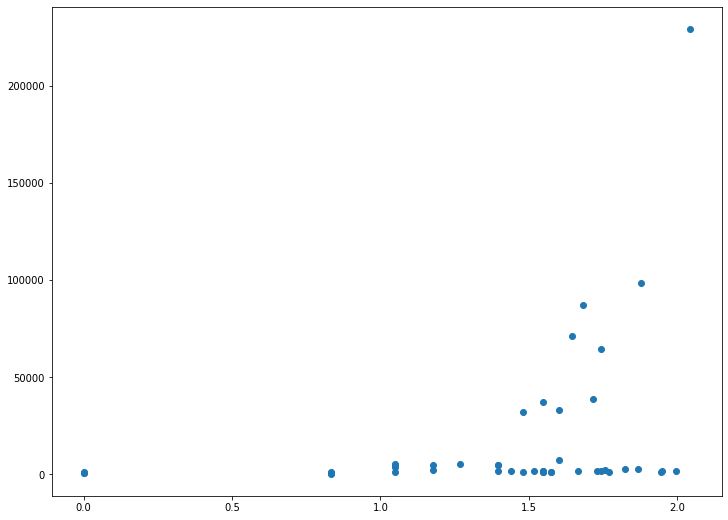

In [531]:
x = np.sqrt(np.log(basic['comment_count']))
plt.scatter(x, y) 
plt.show()

In [426]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

<Figure size 1200x800 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ca091f4d0>,
      dtype=object)

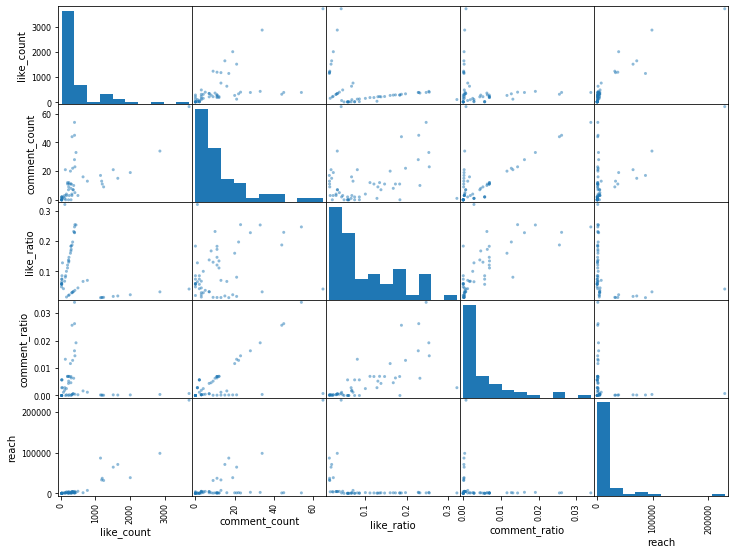

In [430]:
pd.plotting.scatter_matrix(basic)

In [150]:
basic_x = df[['follower_count', 'days_alive', 'like_ratio', 'comment_ratio']]

In [151]:
basic_y = df[['reach']]

In [152]:
basic_y.astype(int)

,reach
2,3006
3,38739
4,33148
5,31838
6,37252
7,98559
8,64602
9,229323
10,86921
11,71246


In [153]:
from statsmodels.formula.api import ols

In [250]:
basic['follower_count'] = basic.follower_count.astype(int)

/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
basic['reach'] = basic.reach.astype(int)

/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [260]:
basic['like_count'] = basic['like_count'].astype(int)
basic['comment_count'] = basic['comment_count'].astype(int)

/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chrisbuetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [259]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 2 to 60
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   like_count      57 non-null     object
 1   comment_count   57 non-null     object
 2   follower_count  57 non-null     int64 
 3   reach           57 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [468]:
basic.columns

Index(['like_count', 'comment_count', 'like_ratio', 'comment_ratio',
       'follower_count', 'reach', 'follower_sq', 'like_sq', 'comment_sq',
       'lr_sq', 'cr_sq', 'follower_log', 'like_log', 'comment_log', 'lr_log',
       'cr_log'],
      dtype='object')

In [537]:
basic1 = basic.copy()

In [658]:
basic1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [728]:
mod = ols(formula='reach ~ like_ratio + comment_ratio', data=basic_low)

In [729]:
res = mod.fit()

In [730]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  reach   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     13.50
Date:                Tue, 04 May 2021   Prob (F-statistic):           5.20e-05
Time:                        14:53:00   Log-Likelihood:                -273.59
No. Observations:                  36   AIC:                             553.2
Df Residuals:                      33   BIC:                             557.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       295.1109    181.883      1.623      0.114     -74.933     665.155
like_ratio     4847.8315   1469.153      3.300      0.002    1858.818    7836.845
comment_ratio  1.517e+04   1.32e+04      1.153      0.257   -1.16e+04    4.19e+04
==============================================================================
Omnibus:                        3.161   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.834
Skew:                           0.669   Prob(JB):                        0.242
Kurtosis:                       2.687   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [750]:
for index, row in basic.iterrows():
    followers = row['follower_count']
    likes = row['like_count']
    comments = row['comment_count']
    reach = (0.81112)*followers + (3.5001)*likes + (0.29991)*comments
    print(str(int(row['reach'])) + ' : ' + str(int(reach)))

38739 : 72798
33148 : 72798
31838 : 72798
37252 : 72798
98559 : 72798
64602 : 72798
229323 : 72798
86921 : 72798
71246 : 72798
820 : 1396
987 : 1396
1154 : 1396
1138 : 1396
1372 : 1396
1543 : 1396
1578 : 1396
1749 : 1396
1056 : 1396
1935 : 1396
2507 : 1396
2784 : 1396
7414 : 8868
4251 : 8868
4686 : 8868
4724 : 8868
4514 : 8868
4924 : 8868
3612 : 8868
3954 : 8868
4514 : 8868
5333 : 8868
1223 : 285
202 : 285
187 : 285
223 : 285
203 : 285
329 : 285
243 : 285
247 : 285
263 : 285
294 : 285
696 : 285
316 : 285
951 : 1292
1240 : 1292
1309 : 1292
1100 : 1292
2003 : 1292
910 : 1292
1341 : 1292
1147 : 1292
1392 : 1292
1200 : 1292
1582 : 1292
1337 : 1292
1702 : 7816


In [276]:
print(basic.iloc[3]);print('\n\n');print(res.predict(basic.iloc[3]))

like_count         1235
comment_count         9
follower_count    89750
reach             31838
Name: 5, dtype: int64



5    39981.325566
dtype: float64


In [107]:
basic.iloc[0]

follower_count    89750.000000
seconds_alive      4914.577356
like_ratio            0.012602
comment_ratio         0.000167
reach              3006.000000
Name: 2, dtype: float64

In [180]:
basic

,follower_count,days_alive,like_ratio,comment_ratio,is_verified,reach
2,89750,0.056882,0.012602,0.000167,False,3006
3,89750,2.043694,0.022351,0.000212,False,38739
4,89750,5.073543,0.013125,0.000145,False,33148
5,89750,7.041997,0.013760,0.000100,False,31838
6,89750,9.059813,0.013315,0.000123,False,37252
7,89750,10.059716,0.031900,0.000379,False,98559
8,89750,15.071490,0.016858,0.000234,False,64602
9,89750,17.062350,0.041292,0.000724,False,229323
10,89750,21.050982,0.012758,0.000189,False,86921
11,89750,24.078980,0.018329,0.000167,False,71246
